## Random forest regression on wind turbine data

## Michael NANA KAMENI

Random forest predicts a variable. Choose predictor variable(s) to predict target variable. Recall that a random forest is an ensemble estimator.

### The data
La Haute Borne is a wind farm in France. It consists of turbines that generate power. Many technical features were measured which influence power output of the wind turbines. The data includes many technical features as well as environmental variables such as wind speed. 

### The goal
Predict power output for each turbine using the input variables given. 

## Preliminaries

Load the necessary libraries.

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

A description of the column headings is given in the following file.

In [3]:
descript = pd.read_csv('data_description.csv', sep=';')

In [4]:
descript.shape

(34, 4)

In [5]:
descript

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Va2,Vane_position_2,deg,Second wind vane on the nacelle
1,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
2,Ws,Wind_speed,m/s,Average wind speed
3,Wa_c,Absolute_wind_direction_corrected,deg,NaN
4,Na_c,Nacelle_angle_corrected,deg,NaN
5,Ot,Outdoor_temperature,deg_C,NaN
6,Yt,Nacelle_temperature,deg_C,NaN
7,Nf,Grid_frequency,Hz,NaN
8,Nu,Grid_voltage,V,NaN
9,Rm,Torque,Nm,NaN


In [6]:
# data = pd.read_csv('wind-data.csv', sep=';', parse_dates=['Date_time'])
data = pd.read_csv('wind-data-truncated.csv', parse_dates=['Date_time'])

In [7]:
data.head()

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


## Investigate the data

Sample from the dataset.

In [8]:
df = data.sample(2000) # random sample

In [9]:
df.index

Int64Index([13520, 13873, 22069,  7471, 20647, 11331, 15415,  9520,  8783,
             6039,
            ...
            18784, 11625, 16171,  1747,  2827, 12359,   896,  2491, 17705,
             9566],
           dtype='int64', length=2000)

In [10]:
df.head()

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13520,477306,R80736,2015-03-03 18:40:00,-0.97,-0.99,0.00,0.11,14.940000,14.0,15.0,...,NaN,NaN,266.92001,NaN,NaN,NaN,266.920010,NaN,NaN,NaN
13873,545420,R80721,2013-07-10 09:00:00,-1.01,-1.01,-1.01,0.00,29.889999,29.0,30.0,...,NaN,NaN,7.87000,NaN,NaN,NaN,41.049999,NaN,NaN,NaN
22069,513576,R80790,2014-01-22 19:00:00,-0.55,-1.01,0.49,0.40,13.000000,13.0,13.0,...,NaN,NaN,128.67000,NaN,NaN,NaN,129.590000,NaN,NaN,NaN
7471,385567,R80721,2014-09-29 01:10:00,-1.00,-1.00,-0.75,0.01,27.000000,27.0,27.0,...,NaN,NaN,174.16000,NaN,NaN,NaN,174.679990,NaN,NaN,NaN
20647,345505,R80721,2016-01-10 01:40:00,-0.99,-1.00,-0.50,0.06,17.000000,17.0,17.0,...,NaN,NaN,198.73000,NaN,NaN,NaN,198.730000,NaN,NaN,NaN


In [11]:
df.describe()

,Unnamed: 0,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,2000.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,...,0.0,0.0,1913.000000,0.0,0.0,0.0,1913.000000,0.0,0.0,0.0
mean,419479.31450,13.766377,12.535451,15.163337,0.887690,19.246251,19.043734,19.464746,0.108611,1064.144696,...,NaN,NaN,174.298573,NaN,NaN,NaN,174.476451,NaN,NaN,NaN
std,243469.63528,28.273104,27.941865,28.858895,3.744600,6.359076,6.357886,6.359135,0.160024,625.853811,...,NaN,NaN,98.169917,NaN,NaN,NaN,98.754340,NaN,NaN,NaN
min,74.00000,-1.040000,-1.080000,-1.040000,0.000000,5.000000,5.000000,5.000000,0.000000,-574.799990,...,NaN,NaN,0.550000,NaN,NaN,NaN,0.080000,NaN,NaN,NaN
25%,207600.00000,-0.990000,-1.000000,-0.990000,0.000000,14.000000,14.000000,14.000000,0.000000,964.464995,...,NaN,NaN,72.500000,NaN,NaN,NaN,70.690002,NaN,NaN,NaN
50%,416536.00000,-0.970000,-0.990000,-0.500000,0.000000,19.000000,19.000000,19.000000,0.000000,1178.930100,...,NaN,NaN,191.240010,NaN,NaN,NaN,192.320010,NaN,NaN,NaN
75%,633649.75000,5.405000,-0.495000,17.910000,0.160000,24.000000,24.000000,24.000000,0.210000,1579.915050,...,NaN,NaN,249.810000,NaN,NaN,NaN,250.320010,NaN,NaN,NaN
max,840316.00000,111.060000,92.779999,161.770000,39.419998,37.000000,37.000000,37.000000,0.680000,1804.650000,...,NaN,NaN,359.870000,NaN,NaN,NaN,359.370000,NaN,NaN,NaN


In [12]:
df.columns

Index(['Unnamed: 0', 'Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min',
       'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=139)

## Preprocess the data

### Clean the data

Fill in missing values here.

In [13]:
df = df.fillna(0)

### Feature engineering

See the strength of relationships between features.

## Identify correlated variables

Use the correlation between features to select features for training the model. We selected positively correlated features for training and prediction.

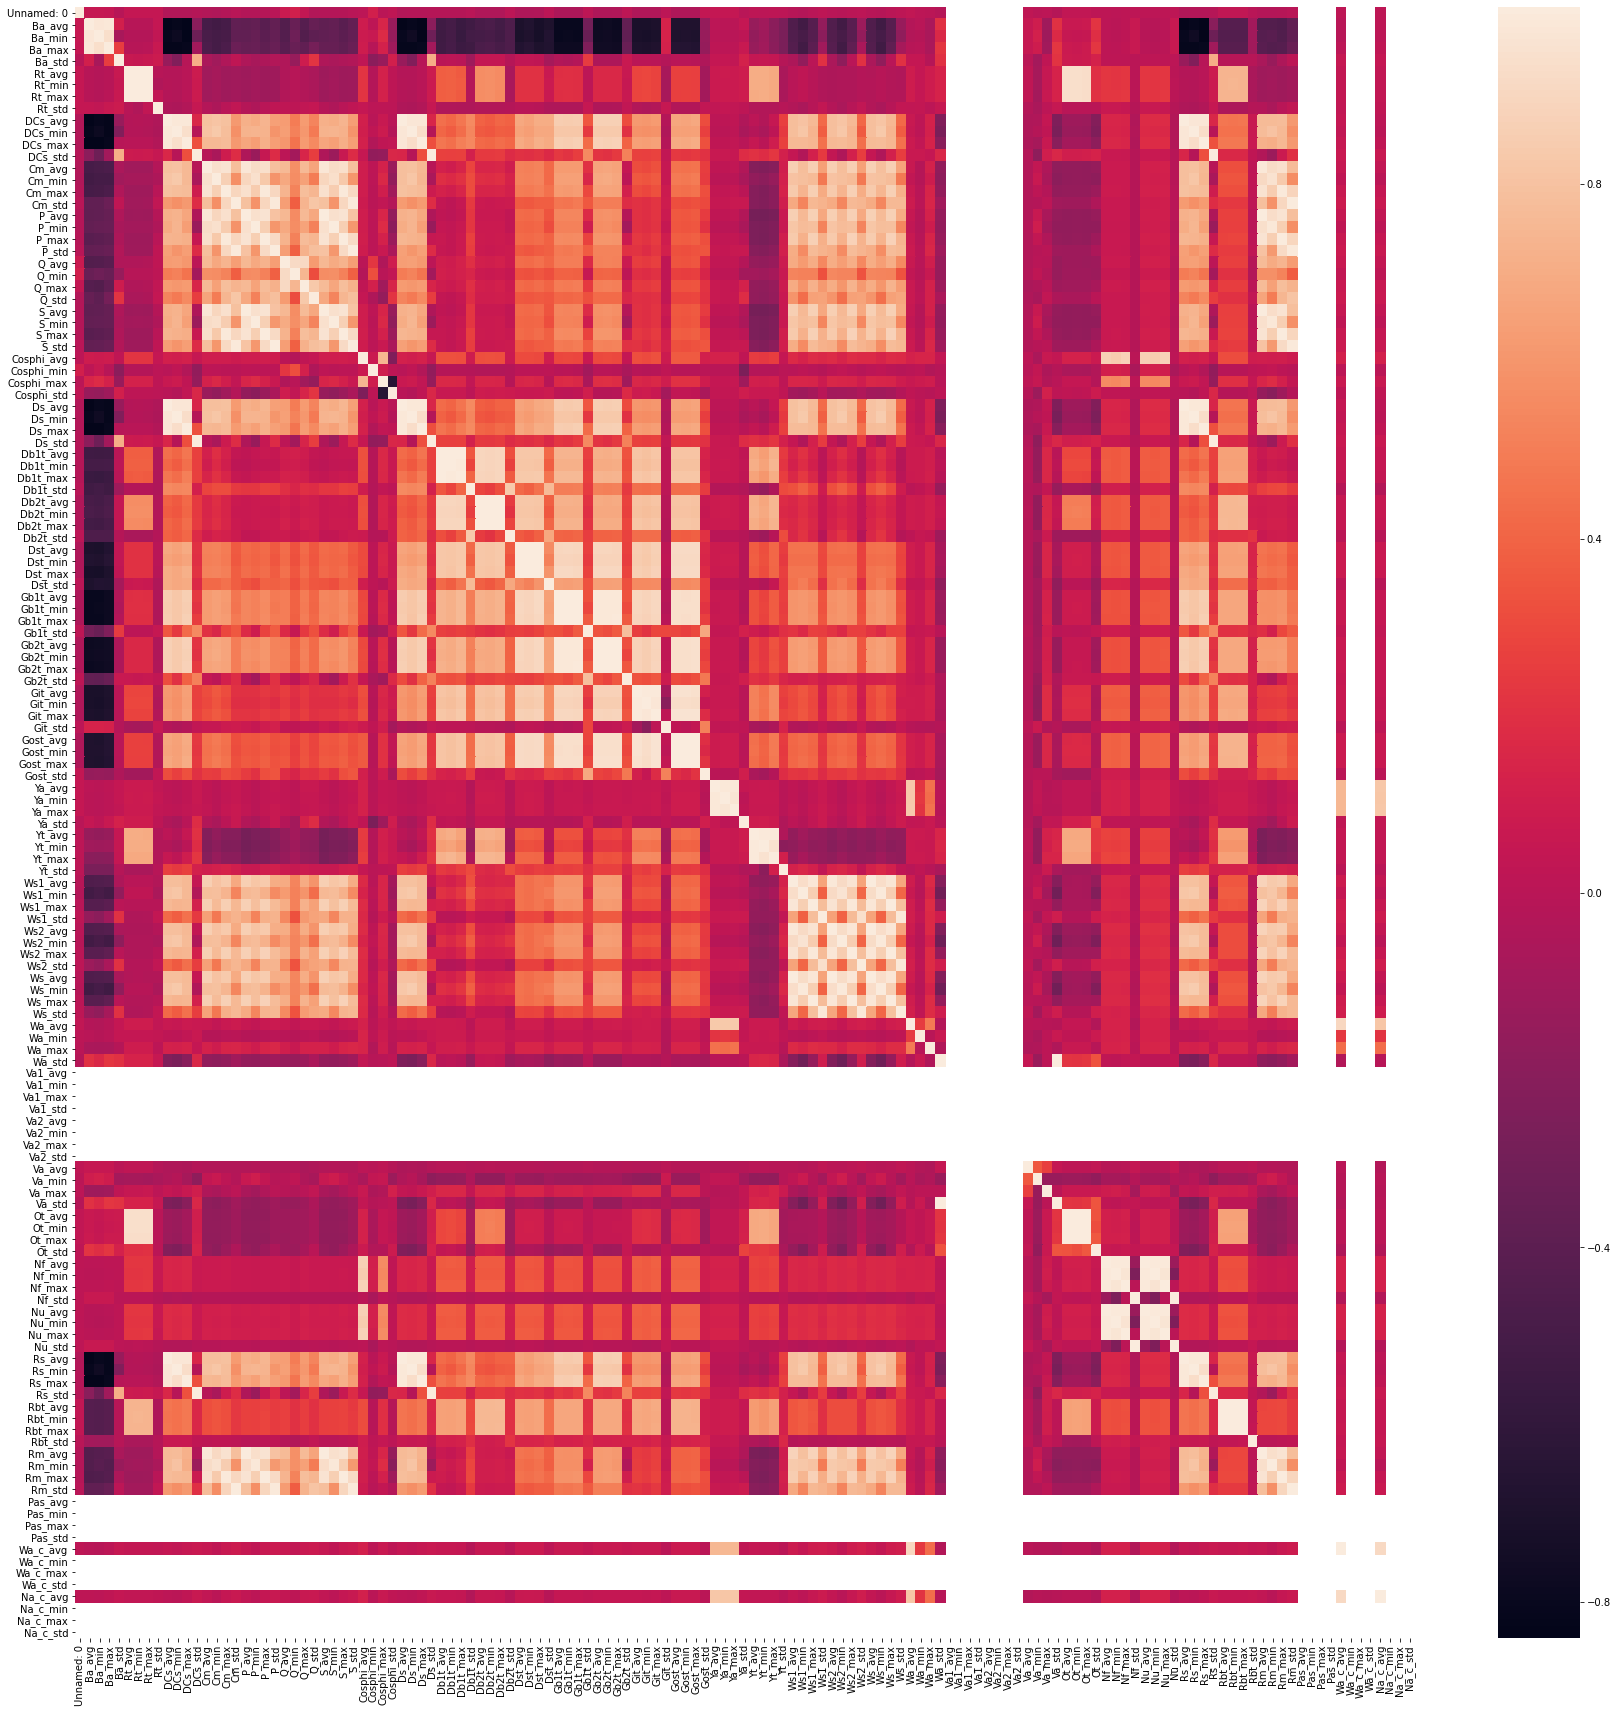

In [14]:
#c = df.corr().abs()
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## What question(s) are we trying to answer?

Can we predict the average power produced `P_avg` from

    the average vane position Va2_avg
    wind speed 2 in m/s Ws2_avg
    the average wind speed Ws_avg
    the average outdoor temperature Ot_avg
    the average absolute wind direction Wa_avg?

See this link for help with possible questions: 
Some questions to ask: [questions](https://github.com/jmwagstaff/La-Haute-Borne/blob/master/README.md)

## Create training and test sets

It is an practice in machine learning is to split a dataset into training and test sets. The training set, which is usullay larger than the test set, is used to train the model. The test set is used to make predictions with the model.

In [15]:
df = df.fillna(df.median(axis=0))

In [16]:
X = df[['Va2_avg','Ws2_avg', 'Ws_avg', 'Ot_avg', 'Wa_avg']].values
Y = df['P_avg'].values

Store the names of the selected attributes.

In [17]:
labels = ['Va2_avg','Ws2_avg', 'Ws_avg', 'Ot_avg', 'Wa_avg']; labels

['Va2_avg', 'Ws2_avg', 'Ws_avg', 'Ot_avg', 'Wa_avg']

Use the sklearn `train_test_split` function to split data in training and test set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Transform the data

We centre the data around a mean of zero and variance of one.

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(array([[   0.,    0.,    0., 1500.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [  97.,  141.,  277.,  452.,  327.,  119.,   50.,   26.,    7.,
            4.],
        [  97.,  153.,  261.,  460.,  326.,  118.,   47.,   21.,   13.,
            4.],
        [  45.,  248.,  313.,  324.,  297.,  177.,   75.,   19.,    2.,
            0.],
        [  68.,  326.,  134.,  309.,  372.,  226.,   65.,    0.,    0.,
            0.]]),
 array([-2.24174834, -1.60303241, -0.96431648, -0.32560054,  0.31311539,
         0.95183132,  1.59054726,  2.22926319,  2.86797912,  3.50669506,
         4.14541099]),
 <a list of 5 Lists of Patches objects>)

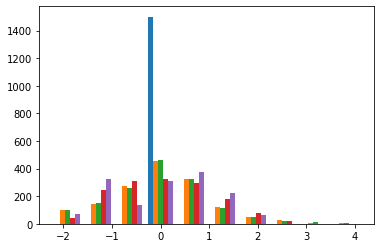

In [20]:
import matplotlib.pyplot as plt
plt.hist(X_train)

(array([[  0.,   0.,   0., 500.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 30.,  60.,  85., 156.,  97.,  36.,  22.,   6.,   4.,   4.],
        [ 34.,  58.,  80., 156.,  98.,  41.,  17.,   8.,   4.,   4.],
        [ 17.,  65.,  99., 114.,  94.,  62.,  35.,  12.,   2.,   0.],
        [ 36.,  91.,  42.,  94., 132.,  74.,  31.,   0.,   0.,   0.]]),
 array([-2.11120452, -1.52440357, -0.93760261, -0.35080166,  0.23599929,
         0.82280025,  1.4096012 ,  1.99640215,  2.5832031 ,  3.17000406,
         3.75680501]),
 <a list of 5 Lists of Patches objects>)

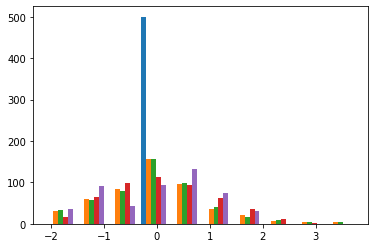

In [21]:
plt.hist(X_test)

For more information on preprocessing data see [Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html).

[Imputation of missing values](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)

## Fit the model

Create the regressor model.

In [22]:
#model = RandomForestRegressor(n_jobs=-1, min_impurity_decrease=10)
model = RandomForestRegressor(n_jobs=-1)

Try a different number of estimators.

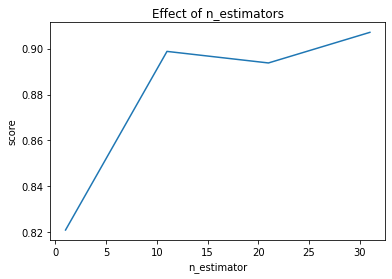

In [23]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## Predict

Apply regressor to test set.

In [24]:
y_predicted = model.predict(X_test)

In [25]:
len(y_predicted), len(y_test)

(500, 500)

## Feature importance

Which features are important for our predictions?

In [26]:
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
2,Ws_avg,0.683763
1,Ws2_avg,0.283082
3,Ot_avg,0.018209
4,Wa_avg,0.014946
0,Va2_avg,0.000000


Turns out the wind speed `Ws_avg` is important in predicting average power output.

## Determine accuracy

In [27]:
from sklearn.metrics import r2_score

In [28]:
score = r2_score(y_test, y_predicted)

In [29]:
score

0.9071013845583769

**Interpretation**: We use the $R^2$ coefficient of determination to determine the accuracy of the model. The best possible score is 1.0 and it can be negative if the model is terrible at predictions. There are many measures one can use to determine the accuracy of a regression model. Two of the measures are:

    1. mean squared error, and 
    2. mean absolute percentage error.
    

### XGBoost

We touched on boosting in the module. Boosting is an ensemble technique that combines typically week predictors like decisions trees and builds a better model sequentially. Here we consider XGBoost designed to control overfitting.

You may have to install xgboost with `conda install -c conda-forge xgboost` (under linux) or `conda install -c anaconda py-xgboost` under Windows. If you have trouble installing XGBoost, you can skip this section.

In [30]:
conda install -c mndrake xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xgb

### Train the model

In [32]:
model = xgb.XGBRegressor()

In [33]:
model.fit(X_train, y_train)

[02:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Make predictions

In [34]:
y_preds = model.predict(X_test)

In [35]:
predictions = [round(i) for i in y_preds]

### Determine accuracy

In [36]:
from sklearn.metrics import explained_variance_score

In [37]:
print(explained_variance_score(predictions,y_test))

0.8977216501719909


### Cross Validate the model

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: ", results.mean())

[02:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

The accuracy changes from 90% with the Random Forest approach, 89% with XGBoost, and 93% with cross validation applied to the XGBoost model.

## Summary

Random forests are an ensemble technique that combines many decision trees to boost performance. The ensemble technique can be evaluated using various measures. Here we used the $R^2$ score. We learned about another ensemble machine learning technique to boost performance by control overfitting. 